# Calidad de un Vino

Dentro de las variedades del vino, existen distintas calidades de este, donde algunos gustan mas a algunas
personas que otras, esto depende de la gran cantidad de químicos y procesos que se aplican a la producción
de vino. Para el área de negocios el estimar cúal es la calidad del vino en base a la apreciación de la gente es
una tarea bastante difícil.

Para esta actividad se trabajará con dos datasets asociados a variantes tinto y blanco del vino Portugues
”Vinho Verde”. Debido a temas privados solo se cuenta atributos fisioquímicos asociados a un vino en
particular, los cuales corresponden a 11 atributos numéricos.
Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
la calidad quality, es un valor entero entre 0 y 10.

### a. Carga y descripción de los datos

A continuacion se cargaran dos datasets con datos fisioquimicos y la calidad en base a estos, para las variedades de vino blanco y tinto. Las caracteristicas que posee cada dataset son las siguientes:

* 1 - fixed acidity 
* 2 - volatile acidity 
* 3 - citric acid 
* 4 - residual sugar 
* 5 - chlorides 
* 6 - free sulfur dioxide 
* 7 - total sulfur dioxide 
* 8 - density 
* 9 - pH 
* 10 - sulphates 
* 11 - alcohol 
* 12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Se carga el dataset con los datos del vino tinto
df_red = pd.read_csv("winequality-red.csv",sep=";")
#Se crea un vector de unos, numero que representara a esta categoria de vino
ones = np.ones(df_red.shape[0])
#Se agrega la columna tipo al dataset de los vinos tinto
df_red["type"] = ones
#Se carga el dataset con los datos del vino blanco
df_white = pd.read_csv("winequality-white.csv",sep=";")
#Se crea un vector de ceros, numero que representara a esta categoria
zeros = np.zeros(df_white.shape[0])
#Se agrega la columna tipo al dataset de los vinos blanco
df_white["type"] = zeros

#Se concatenan ambos datasets 
df = pd.concat([df_red,df_white], axis=0)

In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [3]:
print("La cantidad total de registros:",df.shape[0])
print("La cantidad de registros correspondientes al tipo 1 -> red wine, es",df_red.shape[0])
print("Porcentaje en la muestra",df_red.shape[0]/df.shape[0]*100)
print("La cantidad de registros correspondientes al tipo 0 -> white wine, es",df_white.shape[0])
print("Porcentaje en la muestra",df_white.shape[0]/df.shape[0]*100)

La cantidad total de registros: 6497
La cantidad de registros correspondientes al tipo 1 -> red wine, es 1599
Porcentaje en la muestra 24.611359088810218
La cantidad de registros correspondientes al tipo 0 -> white wine, es 4898
Porcentaje en la muestra 75.38864091118978


Como podemos ver la cantidad de regisros para el vino blanco es aproximadamente 3 veces más que las pertenecientes al vino tinto.

### b. Clasificación del vino según su calidad

In [4]:
# Se agrega la columna 'good_quality' al dataset
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]

In [5]:
#Se quita la columna quality del dataset
df = df.drop(['quality'],axis=1)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0


In [7]:
from sklearn.model_selection import train_test_split

def data_prepration(x):
    #Se guardan solo las caracteristicas, se omite la columna good_quality.
    x_features= x.iloc[:,x.columns != "good_quality"]
    #Se guradan solo las etiquetas correspondietes a las clases.
    x_labels=x.iloc[:,x.columns=="good_quality"]
    #Se separan en subconjuntos los datas, asignando para entrenamiento y testing.
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.25)
    #Se imprime el largo de los nuevos datasets generados. 
    print("Length of training data: %d"%len(x_train))
    print("Length of test data: %d"%len(x_test))
    #Se retornan el train_set y test_set 
    return(x_train,x_test,y_train,y_test)

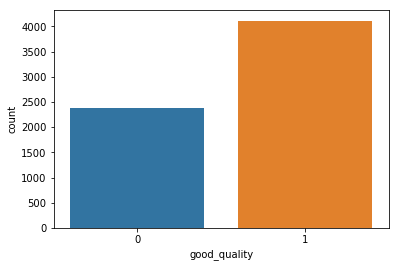

In [8]:
sns.countplot("good_quality",data=df)
plt.show()

In [9]:
count = pd.value_counts(df['good_quality'].values)
print("Cantidad de elementos por clase")
print("=================================================================")
print("=================================================================")
print("Elementos pertenecientes a la clase 0 [Mala calidad] es de", count[0])
print("representa un", count[0]/(count[0] + count[1]), "del total" )
print("=================================================================")
print("Elementos pertenecientes a la clase 1 [Buena calidad] es de", count[1])
print("representa un", count[1]/(count[0] + count[1]), "del total" )
print("=================================================================")

Cantidad de elementos por clase
Elementos pertenecientes a la clase 0 [Mala calidad] es de 2384
representa un 0.36693858704 del total
Elementos pertenecientes a la clase 1 [Buena calidad] es de 4113
representa un 0.63306141296 del total


Como podemos apreciar, tenemos que los datos estan desbalanceados ya que los buenos vinos superan en casi el doble a los malos.

In [10]:
#Se generan los datos de entrenamiento y pruebas.
x_train,x_test,y_train,y_test = data_prepration(df)

Length of training data: 4872
Length of test data: 1625


In [11]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

model_1 = BernoulliNB()
model_1.fit(x_train,y_train.values.ravel())
model_2 = LinearSVC()
model_2.fit(x_train,y_train.values.ravel())
print("=======================================================")
print("Metricas")
print("=======================================================")
print("Naive bayes score:",model_1.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_1.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")
print("SVM score:",model_2.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_2.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")

nby_train= model_1.predict(x_train)
naive_bayes_train = f1_score(y_train.values.ravel(), nby_train ,average = "micro")
nby_test = model_1.predict(x_test)
naive_bayes_test = f1_score(y_test.values.ravel(), nby_test ,average = "micro")

Metricas
Naive bayes score: 0.636307692308
               precision    recall  f1-score   support

 Mala calidad       0.56      0.03      0.06       595
Buena calidad       0.64      0.98      0.77      1030

  avg / total       0.61      0.64      0.51      1625

SVM score: 0.419692307692
               precision    recall  f1-score   support

 Mala calidad       0.38      0.96      0.55       595
Buena calidad       0.84      0.10      0.19      1030

  avg / total       0.67      0.42      0.32      1625



Como podemos apreciar al realizar la prueba de clasificación con los algoritmos de Naive Bayes y SVM, Naive Bayes fue ampliamente superior, ya que entrega un f1-score más alto. Sin embargo SVM obtuvo un mayor recall para la clase minoritaria y bastante alto, lo cual para data desbalanceada es bastante bueno, sin embargo sus demas métricas no son favorables, por lo que para análisis posteriores se usara Naive Bayes. 

### c. Clasificacion del vino usando un arbol

En este punto se entrenara un árbol de clasificación para determinar si el vino es o no de buena calidad, donde además se realizaran variaciones en algunos hiperparametros, para ver como es el comportamiento de este.

Dentro de los hiperparametros que pueden ser modificables tenemos los siguientes:

* **Criterion:** Los criterios soportados son "gini" para la impureza de Gini y "entropía" para la ganancia de información. Estos criterios son usados para determinar la calidad del split.
* **splitter:** Las estrategias compatibles son "best" para elegir la mejor división y "random" para elegir la mejor división aleatoria. Estas estrategias son utilizada para elegir la división en cada nodo. 
* **max_depth:** Indica la profundidad máxima del árbol. Si no sele entrega algún valor, los nodos se expanden hasta que todas las hojas son puras o hasta que todas las hojas contengan menos elementos que min_samples_split.
* **min_samples_split:** El número mínimo de elementos requeridas para dividir un nodo interno: 
    *Si es int, entonces considere min_samples_split como el número mínimo.
    *Si es float, min_samples_split es un porcentaje y ceil(min_samples_split * n_samples) es el número mínimo de muestras para cada división.
* **max_features :** La cantidad de características a considerar cuando se busca la mejor división.
* **etc..**
 
En nuestro caso probaresmos variando los parametros, criterion, max_depth y max_features.

En una primera instancia entrenaremos el árbol con sus parametros por defecto, y veremos su f1 score, precision y recall, para hacernos una idea de como se comporta el modelo.

In [12]:
from sklearn import tree
from sklearn.metrics import f1_score

model_3 = tree.DecisionTreeClassifier()
model_3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

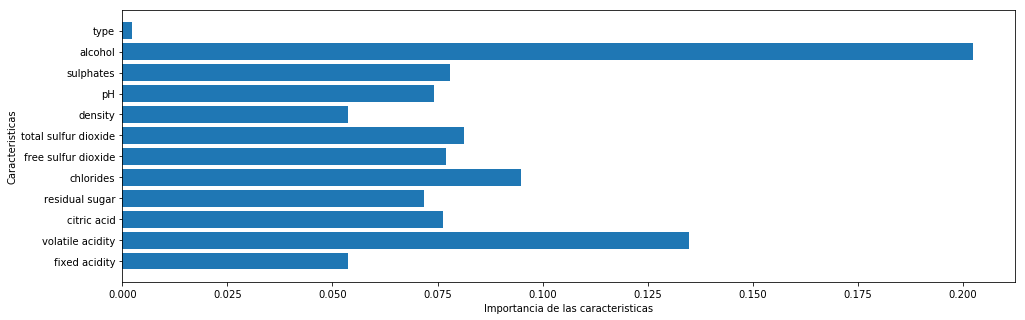

In [13]:
ind = np.arange(0,12)
plt.figure(figsize=(16,5))
plt.barh(ind,model_3.feature_importances_)
plt.yticks(ind,df.columns[:12])
plt.xlabel("Importancia de las caracteristicas")
plt.ylabel("Caracteristicas")
plt.show()

Como podemos ver en el modelo que entrenamos con los parámetros por defecto se consideran de forma bastante equitativa todas las características, exceptuando el alcohol junto con fixed acidity, ya que estos resaltan por sobre los demás con una clara diferencia. Esto tiene relación con el tamaño del árbol, ya que al no limitar ninguno de sus parametros, este tendera a expandirse en tamaño, produciendo una gran cantidad de nodos y bastantes niveles de profundidad, lo que eventualmente conducira al sobreajuste del modelo.

In [14]:
print("Cantidad de nodos generados por este modelo:",model_3.tree_.node_count)

Cantidad de nodos generados por este modelo: 1531


In [15]:
print("=======================================================")
print("hiperparametros por defeto")
print("=======================================================")
print("Entrenamiento - score:",model_3.score(x_train,y_train))
print("===================================")
print(classification_report(y_train.values.ravel(), model_3.predict(x_train), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")
print("Pruebas - score:",model_3.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_3.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")

hiperparametros por defeto
Entrenamiento - score: 1.0
               precision    recall  f1-score   support

 Mala calidad       1.00      1.00      1.00      1789
Buena calidad       1.00      1.00      1.00      3083

  avg / total       1.00      1.00      1.00      4872

Pruebas - score: 0.775384615385
               precision    recall  f1-score   support

 Mala calidad       0.69      0.70      0.70       595
Buena calidad       0.83      0.82      0.82      1030

  avg / total       0.78      0.78      0.78      1625



Como era de esperarse, el modelo se ajustó demasiado bien para la data de entrenamiento, ya que obtenemos para todas las métricas el valor máximo de 1. Por otro lado para la data de pruebas obtenemos métricas cercanas a $0.8$, lo cual es un puntaje bastante bueno, sin embargo al ajustarse tanto a la data de entrenamiento se pierde capacidad de generalización por lo que si probamos con otro dataset probablemente no obtendremos métricas tan buenas, es por esto que se realizarán variaciones en los parámetros que describimos anteriormente con el fin de hacer que el modelo no se ajuste tanto a la data de entrenamiento y quede con una mejor capacidad de generalización.

Para hacer el estudio sobre el comportamiento de los parametros usaremos k-fold cross validation aplicado al 75% de la data.

In [16]:
xm = x_train.as_matrix()
ym = y_train.values.ravel()

In [17]:
from sklearn.model_selection import KFold

def cross_validation(xm,ym,model,k):
    kf = KFold(n_splits=k)
    f1score = []
    nodes = []
    for train, test in kf.split(x_train):
        cross_train = xm[train]
        cross_test = xm[test]
        model.fit(cross_train, ym[train])
        y_pred = model.predict(cross_test)
        f1score.append(f1_score(ym[test], y_pred, average = "micro" ))
        nodes.append(model.tree_.node_count)
    return(np.mean(f1score),np.mean(nodes))

def f1score_var_param(depth,f,crit):
    f1 = []
    nodes = []
    for i in range(1,depth):
        model = tree.DecisionTreeClassifier(random_state=2,max_depth=i,max_features=f,criterion=crit)
        score,nod = cross_validation(xm,ym,model,10)
        f1.append(score)
        nodes.append(nod)
    return f1,nodes

In [18]:
l = []
nodos = []

f1_1,nodo_1 = f1score_var_param(11,"log2","gini")
f1_2,nodo_2 = f1score_var_param(11,6,"gini")
f1_3,nodo_3 = f1score_var_param(11,12,"gini")
f1_4,nodo_4 = f1score_var_param(11,"log2","entropy")
f1_5,nodo_5 = f1score_var_param(11,6,"entropy")
f1_6,nodo_6 = f1score_var_param(11,12,"entropy")

l.append(f1_1)
l.append(f1_2)
l.append(f1_3)
l.append(f1_4)
l.append(f1_5)
l.append(f1_6)

nodos.append(nodo_1)
nodos.append(nodo_2)
nodos.append(nodo_3)
nodos.append(nodo_4)
nodos.append(nodo_5)
nodos.append(nodo_6)

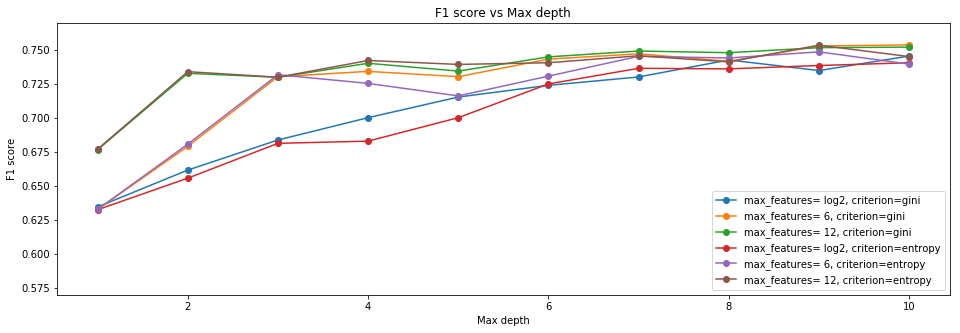

In [19]:
depth = np.arange(1,11)
plt.figure(figsize=(16,5))
plt.xlabel("Max depth")
plt.ylim((0.57,0.77))
plt.ylabel("F1 score")
plt.title("F1 score vs Max depth")
plt.plot(depth,l[0], '-o',label= "max_features= log2, criterion=gini")
plt.plot(depth,l[1], '-o',label= "max_features= 6, criterion=gini")
plt.plot(depth,l[2], '-o',label= "max_features= 12, criterion=gini")
plt.plot(depth,l[3], '-o',label= "max_features= log2, criterion=entropy")
plt.plot(depth,l[4], '-o',label= "max_features= 6, criterion=entropy")
plt.plot(depth,l[5], '-o',label= "max_features= 12, criterion=entropy")
plt.legend(loc = "best")
plt.show()

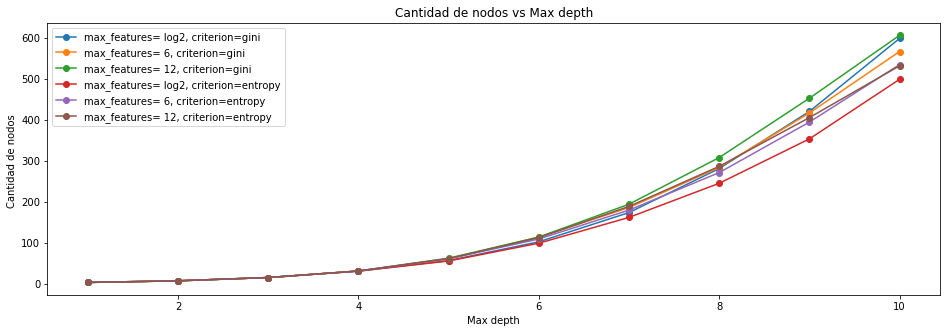

In [20]:
depth = np.arange(1,11)
plt.figure(figsize=(16,5))
plt.xlabel("Max depth")
#plt.ylim((0.57,0.77))
plt.ylabel("Cantidad de nodos ")
plt.title("Cantidad de nodos vs Max depth")
plt.plot(depth,nodos[0], '-o',label= "max_features= log2, criterion=gini")
plt.plot(depth,nodos[1], '-o',label= "max_features= 6, criterion=gini")
plt.plot(depth,nodos[2], '-o',label= "max_features= 12, criterion=gini")
plt.plot(depth,nodos[3], '-o',label= "max_features= log2, criterion=entropy")
plt.plot(depth,nodos[4], '-o',label= "max_features= 6, criterion=entropy")
plt.plot(depth,nodos[5], '-o',label= "max_features= 12, criterion=entropy")
plt.legend(loc = "best")
plt.show()

En base a las pruebas realizadas con cada parametro en la validación cruzada escogeremos los parametros y mediremos las metricas para el conjunto de entrenamiento y test. La idea es escoger valores en los parametros que hagan que el arbol tenga una buena relacion entre generalizacion y su f1 score. Esta generalizacion generalmente esta relacionada al tamaño del arbol, donde arboles muy grandes tienden al overfitting y arboles muy pequeños tienenden al underfitting, por lo que se buscara un arbol que tenga un tamaño equilibrado. 

En base a las graficas obtenidas tenemos que para una profundidad de 4 se obtiene un f1-score cercano a 0.73 para los para los criterios gini y entropy con un max_features de 12, siendo levemente superior, para el criterio gini, ademas tenemos que para ambos se obtiene una profundidad cercana a los 60 nodos. En base a estos datos escogeremos los siguientes valores para los parametros:
* criterion = gini
* max_depth = 4
* max_features = 12

A continuación entrenaremos el modelo para los valores recien mencionados. 

In [21]:
model_4 = tree.DecisionTreeClassifier(criterion="gini",max_features=12,max_depth=4)
model_4.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=12, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

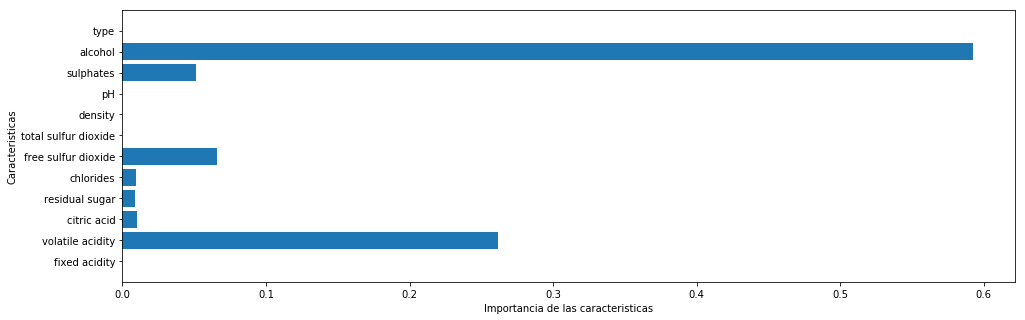

In [22]:
ind = np.arange(0,12)
plt.figure(figsize=(16,5))
plt.barh(ind,model_4.feature_importances_)
plt.yticks(ind,df.columns[:12])
plt.xlabel("Importancia de las caracteristicas")
plt.ylabel("Caracteristicas")
plt.show()

Podemos ver que al contrario del modelo que entrenamos con los parametros por defecto, este le da importancia a muchas menos variables, lo cual es coherente con la cantidad de nodos y profundidad del nuevo arbol.

In [23]:
print("=======================================================")
print("Cantidad de nodos generados por este modelo:",model_4.tree_.node_count)
print("=======================================================")
print("hiperparametros: criterion = gini - max_depth = 4 - max_features = 12")
print("=======================================================")
print("Entrenamiento - score:",model_4.score(x_train,y_train))
print("===================================")
print(classification_report(y_train.values.ravel(), model_4.predict(x_train), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")
print("Pruebas - score:",model_4.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_4.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")

Cantidad de nodos generados por este modelo: 31
hiperparametros: criterion = gini - max_depth = 4 - max_features = 12
Entrenamiento - score: 0.755541871921
               precision    recall  f1-score   support

 Mala calidad       0.67      0.66      0.66      1789
Buena calidad       0.80      0.81      0.81      3083

  avg / total       0.75      0.76      0.76      4872

Pruebas - score: 0.739692307692
               precision    recall  f1-score   support

 Mala calidad       0.65      0.64      0.64       595
Buena calidad       0.79      0.80      0.80      1030

  avg / total       0.74      0.74      0.74      1625



Como podemos apreciar los valores de las metricas para el dataset de entreamiento y el de pruebas son bastante parejas, destacando que, el recall y precisión para la clase minoritaria es aceptable.

Otras formas con las que se podria mejorar las metricas es haciendo un preprocesamiento de los datos mediante reduccion de dimensionalidad o seleccion de caracteristicas, con el fin de dejar solo las caracteristicas que realmente aporten al modelo.

### d y e. Ensamblados de arboles

En esta sección se entrenan dos ensamblados de árboles de decisión. Ambos modelos serán generados a partir del los algoritmos random forest y adaboost respectivamente, evaluando su desempeño a medida que se aumenta el número de árboles que compondrán cada  ensamblados. Finalmente se realizará una comparación sobre el  desempeño de cada uno indicado por  la métrica f1-score.

In [24]:
#Funcion utilizada para hacer k-fold cross-validation
def cross_validation2(xm,ym,model,k):
    kf = KFold(n_splits=k)
    f1score = []
    for train, test in kf.split(x_train):
        cross_train = xm[train]
        cross_test = xm[test]
        model.fit(cross_train, ym[train])
        y_pred = model.predict(cross_test)
        f1score.append(f1_score(ym[test], y_pred, average = "micro"))
    return(np.mean(f1score))

#funcion que busca el maximo puntaje y retorna su posicion en la lista. 
def max_score(l):
    m = max(l)
    ind = l.index(max(l))
    return m,ind   

#numero de arboles maximo que tendra cada ensamblado
n = 40

El primer algoritmo con el que se realizarán pruebas es Random forest, el cual esta basado en bagging con arboles de decision. La lógica de este algoritmo es generar muchos árboles de decisión sobre los datos de entrada, utilizando una cantidad reducida de las variables que se encuentran disponibles. La técnica explora así diferentes subsegmentos del espacio de entrada, y aprende patrones muy complejos aprovechando la diversidad de los clasificadores que entrena.

In [25]:
from sklearn.ensemble import RandomForestClassifier

f1_random_forest_train = []
f1_random_forest_test = []
f1_random_forest_val = []
for i in range(1,n):
    model = RandomForestClassifier(n_estimators=i, max_depth=4,n_jobs=-1)
    model.fit(x_train,y_train.values.ravel())
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    f1_random_forest_test.append(f1_score(y_test.values.ravel(), y_pred_test, average = "micro"))
    f1_random_forest_train.append(f1_score(y_train.values.ravel(), y_pred_train, average = "micro"))
    f1_random_forest_val.append(cross_validation2(xm,ym,model,10))
    

In [26]:
maximo_train, indice_train = max_score(f1_random_forest_train)
maximo_test, indice_test = max_score(f1_random_forest_test)
maximo_val, indice_val = max_score(f1_random_forest_val)
print("El maximo F1 score obtenido usando la data de entrenamiento es:",maximo_train,"Con",indice_train +1,"arboles")
print("El maximo F1 score obtenido usando la data de pruebas es:",maximo_test,"Con",indice_test +1,"arboles")
print("El maximo F1 score obtenido haciendo cross-validation es:",maximo_val,"Con",indice_val +1,"arboles")

El maximo F1 score obtenido usando la data de entrenamiento es: 0.770320197044 Con 16 arboles
El maximo F1 score obtenido usando la data de pruebas es: 0.756923076923 Con 21 arboles
El maximo F1 score obtenido haciendo cross-validation es: 0.751636398829 Con 38 arboles


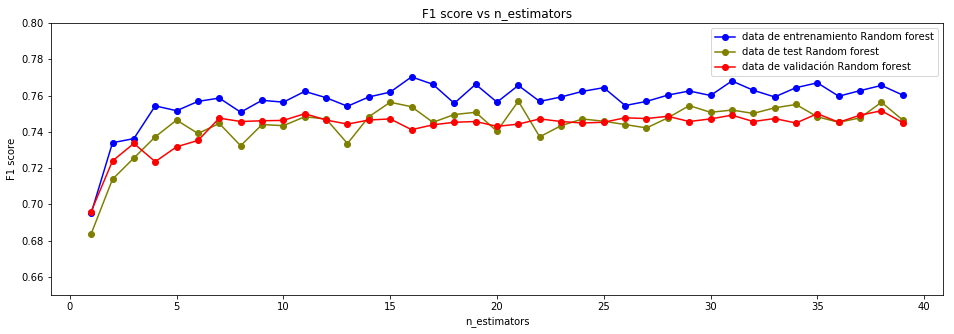

In [27]:
x = np.arange(1,n)
plt.figure(figsize=(16,5))
plt.xlabel("n_estimators")
plt.ylim([0.65,.8])
plt.ylabel("F1 score")
plt.title("F1 score vs n_estimators")
plt.plot(x,f1_random_forest_train, '-o',label= "data de entrenamiento Random forest",color="blue")
plt.plot(x,f1_random_forest_test, '-o',label= "data de test Random forest",color="olive")
plt.plot(x,f1_random_forest_val, '-o',label= "data de validación Random forest",color="red")
plt.legend(loc = "best")
plt.show()

Como podemos ver random forest al ser un clasificador fuerte entrega muy buenos resultados, siendo muy similar el obtenido al hacer cross-validation y el obtenido con el conjunto de test. También podemos notar que la varianza es bastante baja una vez encontrado el número de árboles que estabilizan el modelo. 

A continuación usaremos otro algoritmo de ensamblados: Adaboost.

A difrencia de random forest adaboost no usa los clasificadores para entrenar parte del espacio de caracteristicas, si no que agrega pesos a cada uno de los resultados obtenidos por cada clasifcador, donde les da mayor importancia, a los elementos mal clasificados, es decir, en las  siguientes iteraciones da aviso para que el siguiente clasificador ponga enfasis en mejorar los elementos que están mal clasificados.

In [28]:
from sklearn.ensemble import AdaBoostClassifier

f1_adaboost_train = []
f1_adaboost_test = []
f1_adaboost_val = []
for i in range(1,n):
    model = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=4), n_estimators=i)
    model.fit(x_train,y_train.values.ravel())
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    f1_adaboost_test.append(f1_score(y_test.values.ravel(), y_pred_test, average = "micro"))
    f1_adaboost_train.append(f1_score(y_train.values.ravel(), y_pred_train, average = "micro"))
    f1_adaboost_val.append(cross_validation2(xm,ym,model,10))
    

In [29]:
maximo_train_ada, indice_train_ada = max_score(f1_adaboost_train)
maximo_test_ada, indice_test_ada = max_score(f1_adaboost_test)
maximo_val_ada, indice_val_ada = max_score(f1_adaboost_val)
print("El maximo F1 score obtenido usando la data de entrenamiento es:",maximo_train_ada,"Con",indice_train_ada +1,"arboles")
print("El maximo F1 score obtenido usando la data de pruebas es:",maximo_test_ada,"Con",indice_test_ada +1,"arboles")
print("El maximo F1 score obtenido haciendo cross-validation es:",maximo_val_ada,"Con",indice_val_ada +1,"arboles")

El maximo F1 score obtenido usando la data de entrenamiento es: 0.918719211823 Con 39 arboles
El maximo F1 score obtenido usando la data de pruebas es: 0.782769230769 Con 37 arboles
El maximo F1 score obtenido haciendo cross-validation es: 0.762311913017 Con 26 arboles


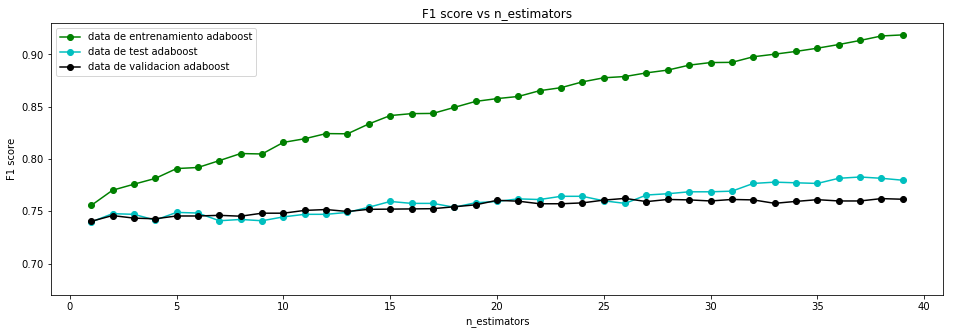

In [30]:
x = np.arange(1,n)
plt.figure(figsize=(16,5))
plt.xlabel("n_estimators")
plt.ylim([0.67,.93])
plt.ylabel("F1 score")
plt.title("F1 score vs n_estimators")
plt.plot(x,f1_adaboost_train, '-o',label= "data de entrenamiento adaboost",color="green")
plt.plot(x,f1_adaboost_test, '-o',label= "data de test adaboost",color="c")
plt.plot(x,f1_adaboost_val, '-o',label= "data de validacion adaboost",color="black")
plt.legend(loc = "best")
plt.show()

Finalmente incluimos las graficas de ambos metodos en uno solo

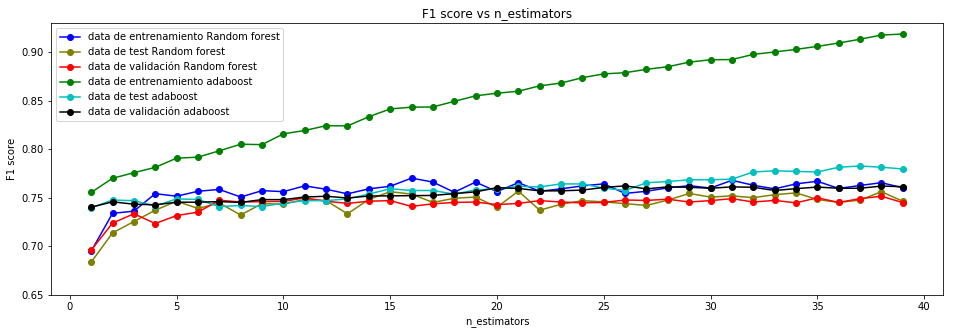

In [31]:
x = np.arange(1,n)
plt.figure(figsize=(16,5))
plt.xlabel("n_estimators")
plt.ylim([0.65,.93])
plt.ylabel("F1 score")
plt.title("F1 score vs n_estimators")
plt.plot(x,f1_random_forest_train, '-o',label= "data de entrenamiento Random forest",color="blue")
plt.plot(x,f1_random_forest_test, '-o',label= "data de test Random forest",color="olive")
plt.plot(x,f1_random_forest_val, '-o',label= "data de validación Random forest",color="red")
plt.plot(x,f1_adaboost_train, '-o',label= "data de entrenamiento adaboost",color="green")
plt.plot(x,f1_adaboost_test, '-o',label= "data de test adaboost",color="c")
plt.plot(x,f1_adaboost_val, '-o',label= "data de validación adaboost",color="black")
plt.legend(loc = "best")
plt.show()

Al observar la grafica podemos notar que el desempeño de ambos algoritmos para este caso particular es bastante similar, siendo un poco superior los resultados obtenidos por Adaboost, lo cual tiene bastante sentido ya que adaboost se preocupa por mejorar los datos que están mal clasificados. En términos generales el algoritmo adaboost tiene un mejor rendimiento que los algoritmos de bagging como random forest, lo cual quedó demostrado en este experimento, sin embargo cuando la data posee mucho ruido, los algoritmos de bagging tienden a ser más efectivos.

### f. Clasificacion usando SVM y comparación entre modelos

Para este punto usaremos una svm no lineal para la clasificación de los vinos, en donde haremos variar algunos de sus parámetros, para estudiar su comportamiento. Luego de eso compararemos este modelo con los obtenidos en los puntos anteriores

Realizando el entrenamiento de SVM con sus parámetros por defecto obtenemos:

In [32]:
from sklearn import svm
from sklearn.svm import SVC


model_5 = svm.SVC()
model_5.fit(x_train,y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
print("=======================================================")
print("hiperparametros por defeto")
print("=======================================================")
print("Entrenamiento - score:",model_5.score(x_train,y_train))
print("===================================")
print(classification_report(y_train.values.ravel(), model_5.predict(x_train), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")
print("Pruebas - score:",model_5.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_5.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")

hiperparametros por defeto
Entrenamiento - score: 0.904556650246
               precision    recall  f1-score   support

 Mala calidad       0.92      0.81      0.86      1789
Buena calidad       0.90      0.96      0.93      3083

  avg / total       0.91      0.90      0.90      4872

Pruebas - score: 0.736615384615
               precision    recall  f1-score   support

 Mala calidad       0.68      0.54      0.60       595
Buena calidad       0.76      0.85      0.80      1030

  avg / total       0.73      0.74      0.73      1625



In [34]:
c = [0.01,0.1,1,10,100]
f1_svm_val = []
for i in range(len(c)):
    model_6 = svm.SVC(C=c[i],random_state=0)
    f1_svm_val.append(cross_validation2(xm,ym,model_6,10))

In [35]:
f1_svm_train = []
f1_svm_test = []
for i in range(len(c)):
    model_6 = svm.SVC(C=c[i],random_state=0,)
    model_6.fit(xm,ym)
    y_pred_train = model_6.predict(x_train)
    f1_svm_train.append(f1_score(y_train.values.ravel(), y_pred_train ,average = "micro"))
    y_pred_test = model_6.predict(x_test)
    f1_svm_test.append(f1_score(y_test.values.ravel(), y_pred_test ,average = "micro"))

In [36]:
maximo_train_svm, indice_train_svm = max_score(f1_svm_train)
maximo_test_svm, indice_test_svm = max_score(f1_svm_test)
maximo_val_svm, indice_val_svm = max_score(f1_svm_val)
print("El maximo F1 score obtenido usando la data de entrenamiento es:",maximo_train_svm,"Con C=",c[indice_train_svm])
print("El maximo F1 score obtenido usando la data de pruebas es:",maximo_test_svm,"Con C=",c[indice_test_svm])
print("El maximo F1 score obtenido haciendo cross-validation es:",maximo_val_svm,"Con C=",c[2])

El maximo F1 score obtenido usando la data de entrenamiento es: 0.998973727422 Con C= 100
El maximo F1 score obtenido usando la data de pruebas es: 0.737846153846 Con C= 100
El maximo F1 score obtenido haciendo cross-validation es: 0.744258508096 Con C= 1


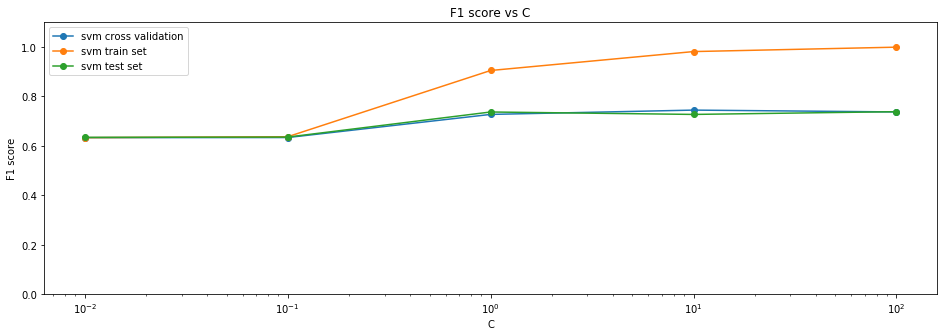

In [37]:
plt.figure(figsize=(16,5))
plt.xlabel("C")
plt.ylim([0.0,1.1])
plt.ylabel("F1 score")
plt.title("F1 score vs C")
plt.semilogx(c, f1_svm_val, '-o',label="svm cross validation")
plt.semilogx(c, f1_svm_train, '-o',label="svm train set")
plt.semilogx(c, f1_svm_test, '-o',label="svm test set")
plt.legend(loc = "best")
plt.show()

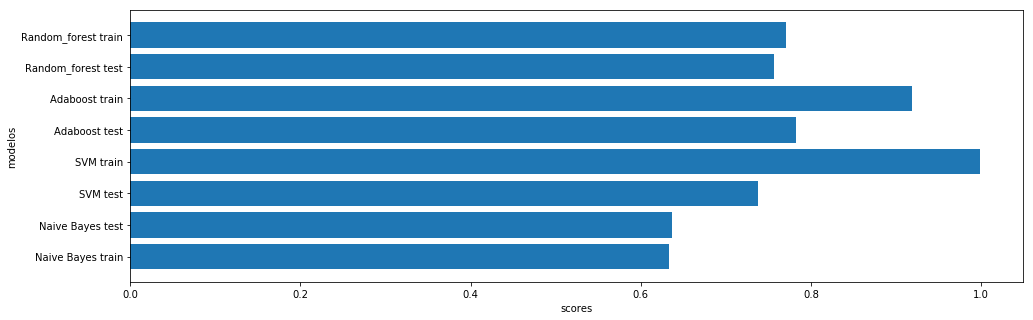

In [40]:
indice = np.arange(0,8)
names = ["Naive Bayes train","Naive Bayes test","SVM test","SVM train","Adaboost test","Adaboost train","Random_forest test","Random_forest train",]
scores = [naive_bayes_train,naive_bayes_test,maximo_test_svm,maximo_train_svm,maximo_test_ada,maximo_train_ada,maximo_test,maximo_train]

plt.figure(figsize=(16,5))
plt.barh(indice,scores)
plt.yticks(indice,names)
plt.xlabel("scores")
plt.ylabel("modelos")
plt.show()

In [41]:
model_6 = svm.SVC(C=10,random_state=0,)
model_6.fit(xm,ym)
print("=======================================================")
print("hiperparametros por defeto")
print("=======================================================")
print("Entrenamiento - score:",model_6.score(x_train,y_train))
print("===================================")
print(classification_report(y_train.values.ravel(), model_6.predict(x_train), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")
print("Pruebas - score:",model_6.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_6.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")

hiperparametros por defeto
Entrenamiento - score: 0.981116584565
               precision    recall  f1-score   support

 Mala calidad       0.98      0.96      0.97      1789
Buena calidad       0.98      0.99      0.99      3083

  avg / total       0.98      0.98      0.98      4872

Pruebas - score: 0.726769230769
               precision    recall  f1-score   support

 Mala calidad       0.63      0.61      0.62       595
Buena calidad       0.78      0.79      0.79      1030

  avg / total       0.73      0.73      0.73      1625



### g. Ranking en parametros de Random forest

Una alternativa para poder encontrar los parametos que son mas importantes para la construccion del modelo usando random forest, será evaluar el f1-escore a medida que se van modificando de manera individual, luego se les dara un orden segun sus varianzas, es decir, se medira la sensibilidad de cada parametro por lo que a mayor varianza mayor será el puesto que se tenga en el ranking.

Los parametros a variar serán los siguientes:

* n_estimators.
* criterion.
* max_depth.
* max_features.
* min_samples_split.
* min_samples_leaf.

In [42]:
n_estimator = np.arange(1,41)
crit = ["gini","entropy"]
depth = np.arange(1,11)
m_features = np.arange(1,13)
min_split = np.arange(2,11)
min_leaf = np.arange(1,11)

v = []

In [43]:
pnames = ["n_estimators","max_depth","criterion","max_features","min_samples_leaf","min_samples_split"]

In [44]:
estimators = []
for i in range(1,len(n_estimator)):
    model = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=2)
    estimators.append(cross_validation2(xm,ym,model,10))
var_n_estimators = np.var(estimators)
v.append(var_n_estimators)

In [45]:
m_depth = []
for i in range(1,len(depth)):
    model = RandomForestClassifier(max_depth=i,n_jobs=-1,random_state=2)
    m_depth.append(cross_validation2(xm,ym,model,10))
var_m_depth = np.var(m_depth)
v.append(var_m_depth)

In [46]:
c = []
for i in range(1,len(crit)):
    model = RandomForestClassifier(criterion=crit[i],n_jobs=-1,random_state=2)
    c.append(cross_validation2(xm,ym,model,10))
var_criterion = np.var(c)
v.append(var_criterion)

In [47]:
features = []
for i in range(len(m_features)):
    model = RandomForestClassifier(max_features=m_features[i],n_jobs=-1,random_state=2)
    features.append(cross_validation2(xm,ym,model,10))
model = RandomForestClassifier(max_features="log2",n_jobs=-1,random_state=2)
features.append(cross_validation2(xm,ym,model,10))
var_features = np.var(features)
v.append(var_features)

In [48]:
leaf = []
for i in range(len(min_leaf)):
    model = RandomForestClassifier(min_samples_leaf=min_leaf[i],n_jobs=-1,random_state=2)
    leaf.append(cross_validation2(xm,ym,model,10))
var_leaf = np.var(leaf)
v.append(var_leaf)

In [49]:
split = []
for i in range(len(min_split)):
    model = RandomForestClassifier(min_samples_split=min_split[i],n_jobs=-1,random_state=2)
    split.append(cross_validation2(xm,ym,model,10))
var_split = np.var(split)
v.append(var_split)

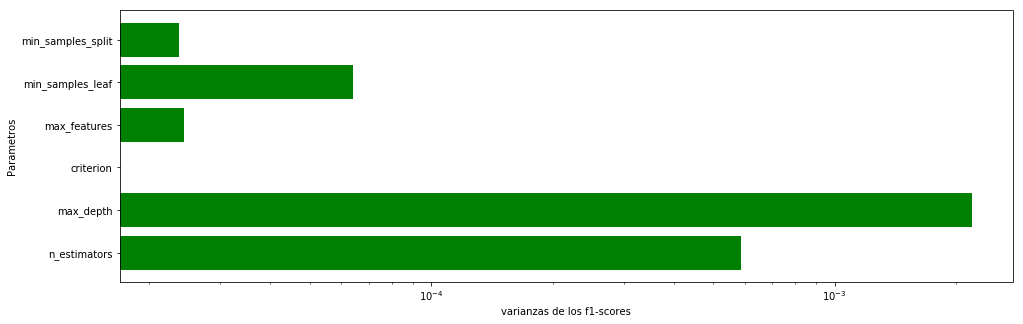

In [52]:
indice = np.arange(0,6)
plt.figure(figsize=(16,5))
plt.barh(indice,v,log=1,color="green")
plt.yticks(indice,pnames)
plt.xlabel("varianzas de los f1-scores")
plt.ylabel("Parametros")
plt.show()